<a href="https://colab.research.google.com/github/LiuYiShan613/T_Project/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3**

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
#顯示小數到第二位
pd.set_option('display.float_format', lambda x:'%.2f'% x)

In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager
  
# 讓繪圖正確跑出中文字
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2021-12-12 15:50:25--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.97.113, 108.177.97.101, 108.177.97.100, ...
Connecting to drive.google.com (drive.google.com)|108.177.97.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0j4rg2ldb37pod7cn704pfrb4tt99ob4/1639324200000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-12-12 15:50:26--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0j4rg2ldb37pod7cn704pfrb4tt99ob4/1639324200000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.8.132, 2404:6800:4008:c15::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.251

In [39]:
sales_data = pd.read_csv('/content/drive/MyDrive/data/data3_project.csv')
#查看前5筆檔案欄位資訊
sales_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04


In [40]:
#去掉customer有null值的
sales_data.drop(sales_data[sales_data['CustomerID'].isnull()].index,inplace=True)
sales_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04
...,...,...,...,...,...,...,...,...,...,...
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00,9100000595826.00,中區,2010-03-15,2012-07-11
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00,9100003028369.00,竹區,2020-12-08,2020-11-26
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00,9100003028369.00,竹區,2020-12-08,2020-11-26
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00,9100003028369.00,竹區,2020-12-08,2020-11-26


In [41]:
#新增revenue欄位
sales_data['Revenue'] = sales_data['Quantity'] * abs(sales_data['UnitPrice'])
sales_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00
...,...,...,...,...,...,...,...,...,...,...,...
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00,9100000595826.00,中區,2010-03-15,2012-07-11,47136.00
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2472.00
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00,9100003028369.00,竹區,2020-12-08,2020-11-26,8752.00
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2640.00


### 第一題

In [42]:
ct_revenue = sales_data.groupby(['Country'])['Revenue'].sum().reset_index()
ct_revenue

,Country,Revenue
0,中區,26938859448.00
1,佐登微爾,1159339584.00
2,南區,11729044592.00
3,台北A區,19440607160.00
4,台北B區,14527691488.00
5,彰雲區,12313428224.00
6,竹區,10939031712.00
7,總管理處,2575628528.00
8,高屏全區,16420603160.00


In [43]:
ct_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  9 non-null      object 
 1   Revenue  9 non-null      float64
dtypes: float64(1), object(1)
memory usage: 272.0+ bytes


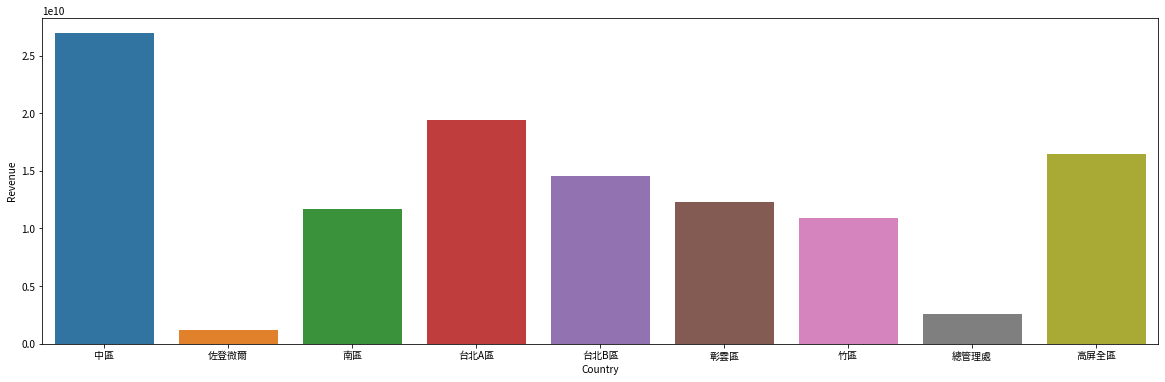

In [44]:
figure,axes = plt.subplots(figsize=(20,6))
sns.barplot(ax=axes, x='Country', y='Revenue', data=ct_revenue)
plt.show()

### 第二題

In [45]:
best_revenue = sales_data.groupby(['Description'])['Revenue'].sum().reset_index()
# 找出銷售最好的產品/課程
best = best_revenue['Revenue'].max()
best_revenue[best_revenue['Revenue']==best]

,Description,Revenue
146,全身健康優化SPA課程單堂,12202477640.00


In [46]:
best_sales = sales_data[sales_data['Description']=='全身健康優化SPA課程單堂']
best_sales_region = best_sales.groupby(['Country'])['Revenue'].sum().reset_index()
best_sales_region

,Country,Revenue
0,中區,2294907384.00
1,南區,1503622328.00
2,台北A區,2919231200.00
3,台北B區,1475806696.00
4,彰雲區,1261692264.00
5,竹區,1081002656.00
6,總管理處,944.00
7,高屏全區,1666214168.00


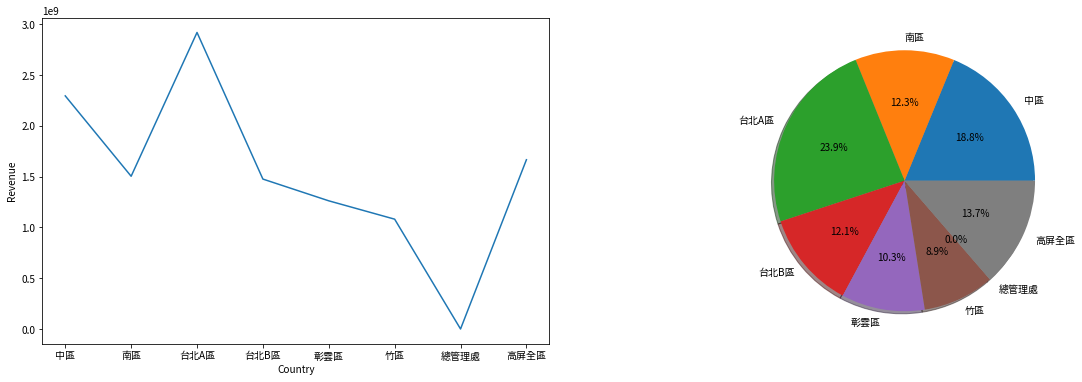

In [47]:
fig,axes = plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='Country',y='Revenue',data=best_sales_region,ax=axes[0])
plt.pie(best_sales_region['Revenue'], labels=best_sales_region['Country'], autopct='%1.1f%%', shadow=True)
plt.show()

### 第三題

In [48]:
sales_data['InvoiceDate'] = pd.to_datetime(sales_data['InvoiceDate'])
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1403724 entries, 0 to 1404434
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   InvoiceNo          1403724 non-null  object        
 1   StockCode          1403724 non-null  object        
 2   Description        1403724 non-null  object        
 3   Quantity           1403724 non-null  float64       
 4   InvoiceDate        1403724 non-null  datetime64[ns]
 5   UnitPrice          1403724 non-null  float64       
 6   CustomerID         1403724 non-null  float64       
 7   Country            1403724 non-null  object        
 8   member_start_date  1366651 non-null  object        
 9   first_trans_date   1400412 non-null  object        
 10  Revenue            1403724 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 128.5+ MB


In [49]:
# 新增month欄位
sales_data['Month'] = sales_data['InvoiceDate'].dt.month
sales_data 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,Month
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,1
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,1
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,1
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,1
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00,9100000595826.00,中區,2010-03-15,2012-07-11,47136.00,12
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2472.00,12
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00,9100003028369.00,竹區,2020-12-08,2020-11-26,8752.00,12
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2640.00,12


In [50]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1403724 entries, 0 to 1404434
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   InvoiceNo          1403724 non-null  object        
 1   StockCode          1403724 non-null  object        
 2   Description        1403724 non-null  object        
 3   Quantity           1403724 non-null  float64       
 4   InvoiceDate        1403724 non-null  datetime64[ns]
 5   UnitPrice          1403724 non-null  float64       
 6   CustomerID         1403724 non-null  float64       
 7   Country            1403724 non-null  object        
 8   member_start_date  1366651 non-null  object        
 9   first_trans_date   1400412 non-null  object        
 10  Revenue            1403724 non-null  float64       
 11  Month              1403724 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 139.2+ MB


In [51]:
# 新增春季的資料表
sales_spring = sales_data[(sales_data['Month']==3) | (sales_data['Month']==4) | (sales_data['Month']==5)]
sales_spring['Season']='spring'
sales_spring

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,Month,Season
82482,PS5553016468,HE59A01,無壓力頭SPA課程單堂,8.00,2019-03-01,213.00,9100001439358.00,高屏全區,2012-10-31,2012-10-31,1704.00,3,spring
82483,PS5553016468,HB95A01,全身健康優化SPA課程單堂,8.00,2019-03-01,985.00,9100001439358.00,高屏全區,2012-10-31,2012-10-31,7880.00,3,spring
82484,PS5553016469,HE59A01,無壓力頭SPA課程單堂,8.00,2019-03-01,213.00,9100000247824.00,高屏全區,2005-01-24,2012-11-06,1704.00,3,spring
82485,PS5553016469,HB95A01,全身健康優化SPA課程單堂,8.00,2019-03-01,985.00,9100000247824.00,高屏全區,2005-01-24,2012-11-06,7880.00,3,spring
82486,PS5553016470,HB95A01,全身健康優化SPA課程單堂,8.00,2019-03-01,985.00,9100001172675.00,高屏全區,2003-09-21,2017-09-30,7880.00,3,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...
978581,PS5523021895,KS061,逆時活齡皇家能量霜50g,16.00,2020-05-31,9729.00,9100002895689.00,高屏全區,2020-05-31,2020-05-31,155664.00,5,spring
978582,PS5523021895,KQ012,玫瑰晶萃潔顏慕絲150ml,16.00,2020-05-31,1817.00,9100002895689.00,高屏全區,2020-05-31,2020-05-31,29072.00,5,spring
978583,PS5523021895,KW014,完美潔淨潔膚膠300ml,16.00,2020-05-31,3659.00,9100002895689.00,高屏全區,2020-05-31,2020-05-31,58544.00,5,spring
978584,PS5523021895,KQ02,玫瑰晶萃活膚液130ml,8.00,2020-05-31,1670.00,9100002895689.00,高屏全區,2020-05-31,2020-05-31,13360.00,5,spring


In [52]:
# 新增夏季的資料表
sales_summer = sales_data[(sales_data['Month']==6) | (sales_data['Month']==7) | (sales_data['Month']==8)]
sales_summer['Season']='summer'
sales_summer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,Month,Season
285856,PS5128000321,HE58A02,(新)溫熱刮痧課程單堂,8.00,2019-06-01,59.00,9100002662144.00,台北A區,2019-06-01,2019-06-01,472.00,6,summer
285857,PS5128000321,HA86A01,太極磁氧靚顏課程單堂,88.00,2019-06-01,9359.00,9100002662144.00,台北A區,2019-06-01,2019-06-01,823592.00,6,summer
285858,PS5128000321,9265,法國樂美雅純白陶瓷耐熱鍋3.5L,8.00,2019-06-01,59.00,9100002662144.00,台北A區,2019-06-01,2019-06-01,472.00,6,summer
285859,PS5128000321,HB90A01,全背順氣活力SPA課程單堂,88.00,2019-06-01,8859.00,9100002662144.00,台北A區,2019-06-01,2019-06-01,779592.00,6,summer
285860,PS5538008555,HB95A01,全身健康優化SPA課程單堂,16.00,2019-06-01,3659.00,9100000702507.00,高屏全區,2011-12-04,2012-10-12,58544.00,6,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176595,PS5523022950,9292,隨身手持涼風扇,24.00,2020-08-31,656.00,9100000179071.00,高屏全區,2001-09-26,2012-10-10,15744.00,8,summer
1176596,PS5143027101,BJ102,檸檬精油10ml MUI,8.00,2020-08-31,862.00,9100000976724.00,台北B區,2002-02-22,2012-12-14,6896.00,8,summer
1176597,PS5143027101,JYB3G1,廣藿香精油10ml,8.00,2020-08-31,1458.00,9100000976724.00,台北B區,2002-02-22,2012-12-14,11664.00,8,summer
1176598,PS5143027101,BJ073,羅文莎葉精油10ml HALAL,8.00,2020-08-31,1758.00,9100000976724.00,台北B區,2002-02-22,2012-12-14,14064.00,8,summer


In [53]:
# 新增秋季的資料表
sales_fall = sales_data[(sales_data['Month']==9) | (sales_data['Month']==10) | (sales_data['Month']==11)]
sales_fall['Season']='fall'
sales_fall

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,Month,Season
443546,PS5142022314,MAB3G1,BA-5肌密抗皺原液(99%)20ml,16.00,2019-09-01,9419.00,9100000037258.00,台北B區,2001-05-04,2012-11-18,150704.00,9,fall
443547,PS5142022315,KK03,24小時黃金璀璨賦活液40ml,8.00,2019-09-01,1775.00,9100002092630.00,台北B區,2016-03-05,2016-03-05,14200.00,9,fall
443548,PS5142022315,JAB7N2,蝶漾潤澤眼貼膜7ml-零售單包,8.00,2019-09-01,293.00,9100002092630.00,台北B區,2016-03-05,2016-03-05,2344.00,9,fall
443549,PS5142022315,JAH3G1,靚顏水凝露精華5ml*10支,8.00,2019-09-01,2555.00,9100002092630.00,台北B區,2016-03-05,2016-03-05,20440.00,9,fall
443550,PS5143022138,HE61A01,plus5智頻美塑儀課程單堂,8.00,2019-09-01,509.00,9100001009933.00,台北B區,2002-08-29,2012-09-19,4072.00,9,fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344561,PS5541009724,KQ02,玫瑰晶萃活膚液130ml,8.00,2020-11-30,1838.00,9100001877655.00,高屏全區,2014-12-25,2014-12-25,14704.00,11,fall
1344562,PS5541009724,BJ102,檸檬精油10ml MUI,8.00,2020-11-30,901.00,9100001877655.00,高屏全區,2014-12-25,2014-12-25,7208.00,11,fall
1344563,PS5336027331,MAFAG4,璀璨亮彩唇膏-米蘭星光,8.00,2020-11-30,1657.00,9100000082784.00,中區,2003-09-02,2012-09-23,13256.00,11,fall
1344564,PS5336027331,KQ05,玫瑰晶萃瞬效乳130ml,8.00,2020-11-30,1654.00,9100000082784.00,中區,2003-09-02,2012-09-23,13232.00,11,fall


In [54]:
# 新增冬季的資料表
sales_winter = sales_data[(sales_data['Month']==12) | (sales_data['Month']==1) | (sales_data['Month']==2)]
sales_winter['Season']='winter'
sales_winter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,Month,Season
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,1,winter
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,1,winter
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,1,winter
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,-12008.00,1,winter
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,1,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00,9100000595826.00,中區,2010-03-15,2012-07-11,47136.00,12,winter
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2472.00,12,winter
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00,9100003028369.00,竹區,2020-12-08,2020-11-26,8752.00,12,winter
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2640.00,12,winter


In [55]:
# 將春夏秋冬的資料表合併
season = pd.concat([sales_spring,sales_summer,sales_fall,sales_winter])
season

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,Month,Season
82482,PS5553016468,HE59A01,無壓力頭SPA課程單堂,8.00,2019-03-01,213.00,9100001439358.00,高屏全區,2012-10-31,2012-10-31,1704.00,3,spring
82483,PS5553016468,HB95A01,全身健康優化SPA課程單堂,8.00,2019-03-01,985.00,9100001439358.00,高屏全區,2012-10-31,2012-10-31,7880.00,3,spring
82484,PS5553016469,HE59A01,無壓力頭SPA課程單堂,8.00,2019-03-01,213.00,9100000247824.00,高屏全區,2005-01-24,2012-11-06,1704.00,3,spring
82485,PS5553016469,HB95A01,全身健康優化SPA課程單堂,8.00,2019-03-01,985.00,9100000247824.00,高屏全區,2005-01-24,2012-11-06,7880.00,3,spring
82486,PS5553016470,HB95A01,全身健康優化SPA課程單堂,8.00,2019-03-01,985.00,9100001172675.00,高屏全區,2003-09-21,2017-09-30,7880.00,3,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00,9100000595826.00,中區,2010-03-15,2012-07-11,47136.00,12,winter
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2472.00,12,winter
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00,9100003028369.00,竹區,2020-12-08,2020-11-26,8752.00,12,winter
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00,9100003028369.00,竹區,2020-12-08,2020-11-26,2640.00,12,winter


In [56]:
sea_revenue = season.groupby(['Season'])['Revenue'].sum().reset_index()
sea_revenue

,Season,Revenue
0,fall,29614541536.00
1,spring,28946035592.00
2,summer,28654689096.00
3,winter,28828967672.00


In [57]:
sea_customer = season.groupby(['Season'])['CustomerID'].count().reset_index()
sea_customer

,Season,CustomerID
0,fall,353732
1,spring,400500
2,summer,355472
3,winter,294020


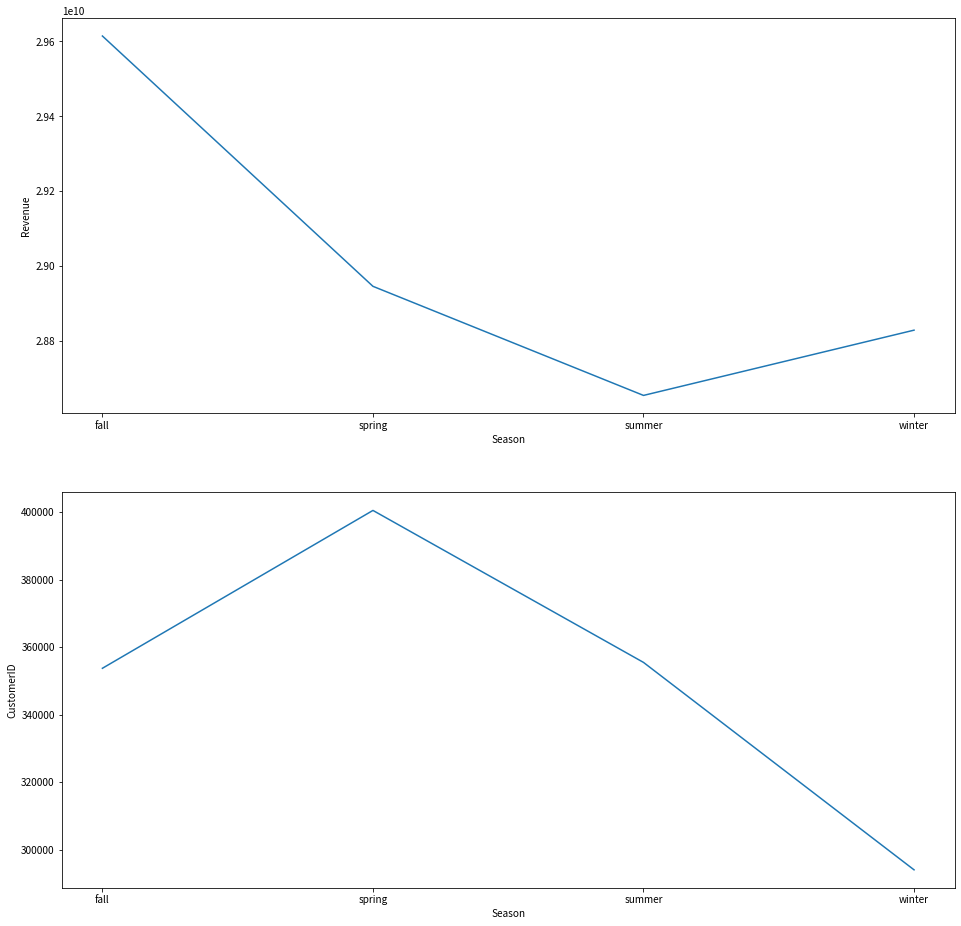

In [58]:
figure,axes = plt.subplots(2,1,figsize=(16,16))
sns.lineplot(ax=axes[0], x='Season', y='Revenue', data=sea_revenue)
sns.lineplot(ax=axes[1], x='Season', y='CustomerID', data=sea_customer)
plt.show()